In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [5]:
## 讀取時為BGR  需轉成RGB


In [7]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [12]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

[[163.19802311 197.58731113 120.54865201]
 [107.12369078  95.04544827  71.16348821]]
[[160.65309853 204.75578313 114.70705385]
 [ 57.46763023  54.49196025  45.86229047]
 [143.56602859 127.91092263  96.78729816]
 [183.78609826 182.50037058 164.58990909]]
[[197.82738729 198.88656392 186.23291754]
 [163.40565779 211.83345234 117.66265939]
 [113.93430497  98.29066554  66.80896377]
 [ 37.79468465  40.15246982  40.88833457]
 [169.41933642 163.17117039 141.20429974]
 [154.67418067 192.73392816 110.88767749]
 [148.33421106 132.57998386 102.60299637]
 [220.26632997 190.75286195  36.86060606]]
[[157.18872472 192.92595289 112.21327289]
 [135.67054815 123.00166041  95.13074136]
 [ 25.96156719  27.21382203  26.06221635]
 [176.58658499 176.04199938 152.69942555]
 [156.75161533 139.90030281 108.23372616]
 [ 92.63041415  75.02046992  44.30669277]
 [227.71247401 201.48024948  36.93180873]
 [217.06257813 216.4715625  210.92148438]
 [159.12976415 207.11810829 112.57771176]
 [140.75777815 182.27489609 107

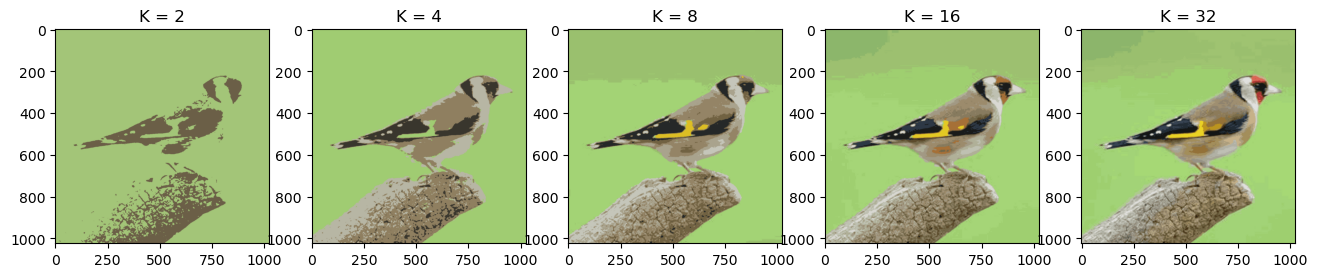

In [32]:
h, w, c = img.shape
#print(img.shape)
Z = img.reshape((-1,3))
Ka = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i,K in enumerate(Ka):
    label, center = km_clust(Z, K)
    #Convert back into uint8
    center = np.uint8(center[:,:3])
    res = center[label.flatten()]
    res = res.reshape(img.shape)

    plt.subplot(1,len(Ka),i+1)
    plt.title("K = {}".format(K))
    plt.imshow(res)

plt.show()

## 1-2. cluster with RGB values and the location

[[157.16601438 181.078536   117.12421391 767.73007152 509.75316821]
 [153.73207147 185.74508649 110.32742417 255.74842695 513.24356966]]
[[155.55959757 177.51950705 109.33665773 254.99997718 765.64759894]
 [157.07745748 178.86281553 122.7395371  768.69614886 256.89089072]
 [151.81222591 193.98535749 111.29111593 256.3946144  253.87000902]
 [157.33790834 183.32223789 111.52431786 766.6696173  769.09702682]]
[[159.86942173 202.07860202 117.65982784 857.38259244 857.60319854]
 [154.08637632 188.410181   108.53123153 233.65406869 511.23920124]
 [151.98054646 194.06130029 111.71316861 166.5658264  171.29296058]
 [164.27967292 187.36033076 134.31808301 855.49051035 171.64131634]
 [160.04953883 181.79292854 110.69200763 511.28001515 808.17046388]
 [147.82634204 146.01359418 104.57797402 794.60189842 518.04373305]
 [157.12532528 182.06798424 114.10335277 165.68955678 851.57749366]
 [150.61705913 192.15216128 112.28569403 514.22050839 215.50808087]]
[[158.74749843 205.16493546 116.21165595 664.

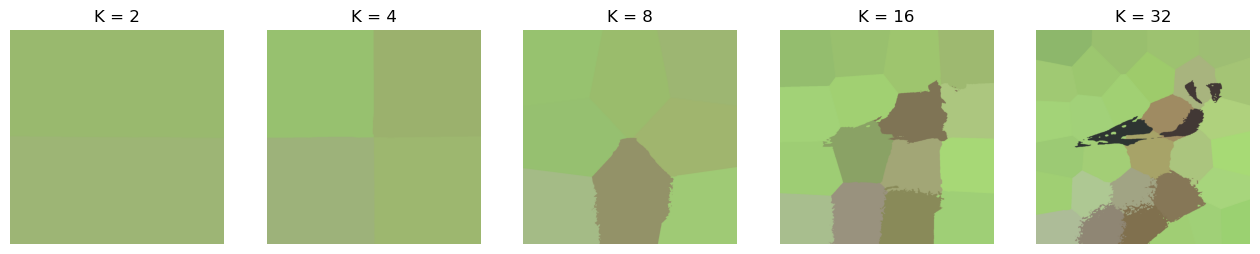

In [38]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

[[152.84351195 174.00689197 107.99657202 134.04180057 187.19627171]
 [158.3802274  194.00916157 120.1718879  120.92936335  61.06174832]]
[[157.87794604 192.34255085 112.37945697  45.50592412 126.76147086]
 [114.24360741 102.20688147  76.20158527 173.87947991 137.41126162]
 [166.13098661 200.18746062 129.37208435 165.73382862  51.02433363]
 [167.57477967 206.35632842 123.00713347 170.42208575 211.60000345]]
[[156.29075897 200.41245992 113.50557308  60.07504458  59.84736293]
 [161.07347701 142.97952543 102.23549766 122.99997422 154.4059854 ]
 [ 46.5643864   47.64176904  45.79917238 116.87623173 136.55901332]
 [132.69950263 120.32125432  91.03382123 218.53897494 127.37053195]
 [159.60262721 194.81682012 113.24238885  36.73992311 183.84634652]
 [172.81557532 212.35909969 127.01175822 129.21519086 218.26387883]
 [162.40872435 208.51344061 120.4753527  219.2035511  211.81243859]
 [167.7601301  201.32764765 132.87529983 184.58115431  51.76777518]]
[[162.26394744 209.73284767 119.83873234 102.

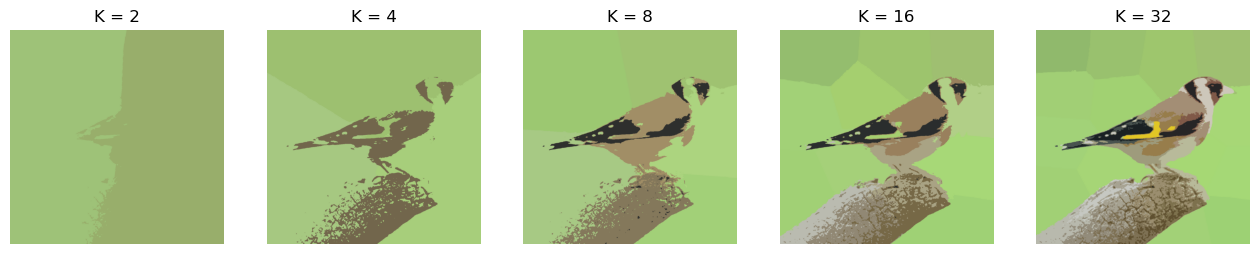

In [40]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()